In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from datetime import datetime
from matplotlib import style

In [2]:
# %% 데이터 읽어오기
raw_risky_ETF_data = pd.read_excel('Universe.xlsx', index_col = 0).iloc[:, :-3][:'2019-5']
raw_cash_ETF_data = pd.read_excel('Universe.xlsx', index_col = 0).iloc[:, -3:][:'2019-5']
raw_kospi_data = pd.read_excel('Kospi_data.xlsx', index_col = 0)['2012-10-31':'2019-5']
raw_risky_ETF_data.dropna(inplace=True)
raw_cash_ETF_data.dropna(inplace=True)

In [3]:
raw_risky_ETF_data

,TIGER 미국S&P500선물(H),TIGER 유로스탁스50(합성 H),TIGER 일본니케이225,KODEX MSCI EM선물(H),TIGER 라틴35,KODEX 중국본토CSI300,TIGER 미국MSCI리츠(합성 H),TIGER 원유선물Enhanced(H),KODEX 골드선물(H),KODEX 미국채울트라30년선물(H),TIGER 단기선진하이일드(합성 H),ARIRANG 단기우량채권
2011-10-31,13090,7539.597798,5325.882824,7495.791386,5185,6758.090079,8590.899989,10100,13105,8321.482230,8154.218033,43048.467988
2011-11-01,12750,7142.928255,5235.302897,7339.214901,5075,6763.656400,8277.804529,10070,13115,8579.268986,8091.864696,43060.175713
2011-11-02,12625,7244.584901,5119.700465,7571.012843,5005,6876.136197,8475.441326,9985,13185,8547.202828,8111.049183,43068.120240
2011-11-03,12555,7421.757009,5119.700465,7647.000995,5085,6880.925239,8576.683064,9950,13250,8440.944385,8125.456326,43078.991699
2011-11-04,12850,7243.257295,5215.085803,7620.135636,5035,6929.693229,8500.213241,10250,13465,8466.723060,8134.507738,43093.626355
2011-11-05,12850,7243.257295,5215.085803,7620.135636,5035,6929.693229,8500.213241,10250,13465,8466.723060,8134.507738,43093.626355
2011-11-06,12850,7243.257295,5215.085803,7620.135636,5035,6929.693229,8500.213241,10250,13465,8466.723060,8134.507738,43093.626355
2011-11-07,12860,7194.104284,5194.756129,7683.841155,5090,6860.741058,8516.799653,10300,13550,8555.376555,8133.298380,43104.915947
2011-11-08,12905,7280.335419,5128.641730,7750.613459,5150,6839.328274,8617.825983,10445,13700,8435.914399,8138.255999,43113.278608
2011-11-09,13045,7110.243873,5187.853165,7300.833604,5150,6899.354274,8215.120815,10600,13705,8586.185216,8075.106439,43122.059401


In [4]:
raw_cash_ETF_data

,KODEX 국고채3년,KBSTAR 국채선물10년,ARIRANG 단기우량채권.1
2011-10-31,53165,43024.260278,43048.467988
2011-11-01,53260,43063.770543,43060.175713
2011-11-02,53280,43083.525676,43068.120240
2011-11-03,53300,43162.143041,43078.991699
2011-11-04,53315,43087.154170,43093.626355
2011-11-05,53315,43087.154170,43093.626355
2011-11-06,53315,43087.154170,43093.626355
2011-11-07,53390,43130.696095,43104.915947
2011-11-08,53395,43252.855386,43113.278608
2011-11-09,53435,43295.994145,43122.059401


In [5]:
raw_kospi_data

,코스피
2012-10-31,1912.06
2012-11-01,1898.44
2012-11-02,1918.72
2012-11-03,1918.72
2012-11-04,1918.72
2012-11-05,1908.22
2012-11-06,1928.17
2012-11-07,1937.55
2012-11-08,1914.41
2012-11-09,1904.41


In [6]:
# %% 월말 주가 뽑기
risky_ETF_data = raw_risky_ETF_data.resample('M').last()
cash_ETF_data = raw_cash_ETF_data.resample('M').last()
kospi_data = raw_kospi_data.resample('M').last()

In [7]:
risky_ETF_data

,TIGER 미국S&P500선물(H),TIGER 유로스탁스50(합성 H),TIGER 일본니케이225,KODEX MSCI EM선물(H),TIGER 라틴35,KODEX 중국본토CSI300,TIGER 미국MSCI리츠(합성 H),TIGER 원유선물Enhanced(H),KODEX 골드선물(H),KODEX 미국채울트라30년선물(H),TIGER 단기선진하이일드(합성 H),ARIRANG 단기우량채권
2011-10-31,13090,7539.597798,5325.882824,7495.791386,5185,6758.090079,8590.899989,10100,13105,8321.482230,8154.218033,43048.467988
2011-11-30,12230,7366.408506,4997.752047,7395.245709,4755,6322.337430,8241.939105,10840,13145,8567.322770,8026.852272,43249.589976
2011-12-31,12890,7322.534306,5010.041101,7081.318298,4910,5881.595150,8581.422039,10920,11880,8829.510763,8190.228381,43368.339756
2012-01-31,13520,7638.978549,5215.743511,7832.092399,5335,6178.766472,9122.096002,10880,13265,8817.564548,8410.331680,43542.283097
2012-02-29,14240,7940.692692,5761.302848,8261.659343,5660,6604.715377,8998.667245,11650,13625,8615.107632,8564.919281,43677.758198
2012-03-31,14540,7830.596269,5974.802941,8042.097570,5570,6155.297660,9420.759129,11230,12720,8271.811123,8612.121831,43811.142635
2012-04-30,14650,7290.545337,5641.404580,7888.874414,5405,6584.706710,9678.279337,11265,12740,8647.173790,8685.967833,43965.015590
2012-05-31,13680,6697.895941,5061.816296,7022.909956,4955,6599.449938,9210.197855,9440,12010,9340.054290,8580.956430,44125.996807
2012-06-30,14045,7158.701472,5336.779434,7350.893472,4765,6172.121990,9687.649583,8530,12060,9221.849631,8711.769990,44259.799376
2012-07-31,14590,7351.520359,5152.076257,7357.119978,4955,5849.450901,9862.345433,9565,12490,9534.966227,8824.833770,44549.565566


In [8]:
kospi_data

,코스피
2012-10-31,1912.06
2012-11-30,1932.90
2012-12-31,1997.05
2013-01-31,1961.94
2013-02-28,2026.49
2013-03-31,2004.89
2013-04-30,1963.95
2013-05-31,2001.05
2013-06-30,1863.32
2013-07-31,1914.03


In [9]:
# %% Momentum 계산 - index: 날짜 / columns : variable(ETF명), value(Momentum), bad_assets(bad asset 갯수)
## P_0 = 2012-10-31인 momentum은 2012-11-30을 index로 하는 데이터로 들어감

def VAA_Momentum(Universe):
    Momentum = (1 * (Universe / Universe.shift(12)) + 2 * (Universe / Universe.shift(6)) + 4 * (
            Universe / Universe.shift(3)) + 12 * (Universe / Universe.shift(1))) - 19
    tmp_mom = pd.DataFrame(Momentum.iloc[-1,:]).T
    tmp_mom.index = [Momentum.index[-1] + relativedelta(days=1) + relativedelta(months=1) - relativedelta(days=1)]
    Momentum = Momentum.shift(1)
    Momentum = pd.concat([Momentum, tmp_mom], axis = 0)
    Momentum.dropna(inplace=True)
    df = pd.melt(Momentum.reset_index(), id_vars='index')
    df = df.set_index('index')
    df['bad_assets'] = df['value'].apply(lambda x: np.where(x <= 0, 1, 0))
    return df

In [10]:
risky_ETF_momentum = VAA_Momentum(risky_ETF_data)
cash_ETF_momentum = VAA_Momentum(cash_ETF_data)

In [11]:
cash_ETF_momentum

,variable,value,bad_assets
index,,,
2012-11-30,KODEX 국고채3년,0.105737,0
2012-12-31,KODEX 국고채3년,0.041513,0
2013-01-31,KODEX 국고채3년,-0.081704,1
2013-02-28,KODEX 국고채3년,0.045474,0
2013-03-31,KODEX 국고채3년,0.105805,0
2013-04-30,KODEX 국고채3년,0.113330,0
2013-05-31,KODEX 국고채3년,0.099760,0
2013-06-30,KODEX 국고채3년,-0.069602,1
2013-07-31,KODEX 국고채3년,-0.208998,1


In [12]:
# %% 리턴 데이터프레임 구성 - columns : index(날짜), variable(ETF명), value(monthly return)

def Return(Universe):
    df = Universe.pct_change().dropna()
    df = pd.melt(df.reset_index(), id_vars='index')
    return df

In [13]:
risky_ETF_monthly_return = Return(risky_ETF_data)
cash_ETF_monthly_return = Return(cash_ETF_data)
kospi_monthly_return = Return(kospi_data).set_index(['index']).drop(['variable'], axis=1)
Kospi_daily_return = raw_kospi_data.pct_change().dropna()

In [14]:
risky_ETF_monthly_return

,index,variable,value
0,2011-11-30,TIGER 미국S&P500선물(H),-0.065699
1,2011-12-31,TIGER 미국S&P500선물(H),0.053966
2,2012-01-31,TIGER 미국S&P500선물(H),0.048875
3,2012-02-29,TIGER 미국S&P500선물(H),0.053254
4,2012-03-31,TIGER 미국S&P500선물(H),0.021067
5,2012-04-30,TIGER 미국S&P500선물(H),0.007565
6,2012-05-31,TIGER 미국S&P500선물(H),-0.066212
7,2012-06-30,TIGER 미국S&P500선물(H),0.026681
8,2012-07-31,TIGER 미국S&P500선물(H),0.038804
9,2012-08-31,TIGER 미국S&P500선물(H),0.008225


In [15]:
kospi_monthly_return

,value
index,
2012-11-30,0.010899
2012-12-31,0.033188
2013-01-31,-0.017581
2013-02-28,0.032901
2013-03-31,-0.010659
2013-04-30,-0.020420
2013-05-31,0.018891
2013-06-30,-0.068829
2013-07-31,0.027215


In [18]:
# %% vaa portfolio monthly, daily 수익률
## Protection_threshold(B), Top(T)가 정해진 경우, VAA 전략으로 투자했을 때의 portfolio return
## Ex) momentum data = 2012-11-30 ~ 2019-03-31, return data = 2011-11-30 ~ 2019-02-28 넣으면?
##    return되는 data = 2012-11-30 ~ 2019-02-28 (2012-11-01 투자부터 2019-02-01 투자까지의 수익률이 나옴)
## Ex) momentum data : risky_ETF_momentum['2013-01':]으로 넣으면, 2013-01-01 투자부터의 수익률이 나옴
##    monthly_return data는 그대로 두고, momentum data의 날짜만 변경함으로써 원하는 기간의 수익률 구할 수 있음

def VAA_return(Risky_momentum, Cash_momentum, Risky_return, Cash_return, Protection_threshold, Top):
    # risky & cash proportion
    if Protection_threshold == 0:
        cash_ETF_portion = (Risky_momentum.groupby(['index'])['bad_assets'].sum() / 1)
        cash_ETF_portion.iloc[:] = 1
    elif Protection_threshold != 0:
        cash_ETF_portion = (Risky_momentum.groupby(['index'])['bad_assets'].sum() / Protection_threshold).map(
            lambda x: np.where(x >= 1, 1, x))
    risky_ETF_portion = 1 - cash_ETF_portion
    
    # risky_ETF_list : momentum 기준으로 상위 Top개 list 뽑아냄 (index(날짜), columns : variable(ETF명))
    risky_ETF_list = Risky_momentum.groupby(['index'], group_keys=False).apply(lambda x: x.nlargest(Top, 'value')).iloc[:,:1]
    cash_ETF_list = Cash_momentum.groupby(['index'], group_keys=False).apply(lambda x: x.nlargest(1, 'value')).iloc[:, :1]

    # list 기준으로 monthly return 뽑아냄 (columns : index(날짜), variable(ETF명), value(monthly return))
    risky_ETF_return = pd.merge(Risky_return, risky_ETF_list, on=['index', 'variable']).sort_values(
        by='index').reset_index(drop=True)
    cash_ETF_return = pd.merge(Cash_return, cash_ETF_list, on=['index', 'variable']).sort_values(
        by='index').reset_index(drop=True)

    # equally weight
    vaa_port_monthly_return = ((risky_ETF_return.groupby(['index'])['value'].mean() * risky_ETF_portion) + (
            cash_ETF_return.groupby(['index'])['value'].mean() * cash_ETF_portion)).dropna()

    return vaa_port_monthly_return

In [19]:
# %% 퍼포먼스 계산
## return series를 넣으면? 해당 return series의 performance 계산
## Cumulative Return, Annualized Return, Annualized Volatility, MDD, MDD duration, Sharpe_ratio, MAR_ratio, RAD
## 참고! RAD>=0 (always)

def performance(port_monthly_return):
    cum_return = ((port_monthly_return + 1).cumprod() - 1)

    # 전체 누적 수익률
    cum_return_last = cum_return.tail(1).iloc[0]

    # 연 평균 수익률
    yearly_return = pow(cum_return_last + 1, (1 / (len(port_monthly_return) / 12))) - 1
    # yearly_return_last_36m = pow(cum_return_last_36m_last + 1, (
    #         1 / (len(port_return_monthly[cum_return.index.strftime("%Y-%m").drop_duplicates()[-36]:]) / 12))) - 1

    # MDD
    hwm = [0]
    eq_idx = cum_return.index
    drawdown = pd.Series(index=eq_idx)
    duration = pd.Series(index=eq_idx)

    for t in range(1, len(eq_idx)):    # 1부터 len(eq_idx)-1까지
        cur_hwm = max(hwm[t - 1], float(cum_return.iloc[t]))
        hwm.append(cur_hwm)
        drawdown[t] = hwm[t] - float(cum_return.iloc[t])
        duration[t] = 0 if drawdown[t] == 0 else duration[t - 1] + 1

    MDD = drawdown.max()
    Duration = duration.max()    # Duration 조금 이상! 의미 없으므로 무시할 것.

    # sharpe
    yearly_std = port_monthly_return.std() * np.sqrt(12)
    sharpe = float(yearly_return) / float(yearly_std)

    # MAR ratio
    MAR = yearly_return / MDD if MDD != 0 else 0    # B,T optimize할 때, MDD=0인 경우 발생, 이 경우 MAR ration = 0으로 둠

    # RAD ratio
    RAD = yearly_return * (1 - (MDD / (1 - MDD))) if (yearly_return >= 0) & (MDD <= 0.5) else 0

    # performance
    performance_data = {'Cumulative Return': float(cum_return_last),
                        'Annualized Return': float(yearly_return),
                        'Annualized Volatility': float(yearly_std),
                        'MDD': MDD, 'MDD duration': Duration, 'Sharpe_ratio': sharpe, 'MAR_ratio': float(MAR),
                        'RAD': float(RAD)}

    total_performance = pd.Series(performance_data)

    return total_performance

In [20]:
# B,T optimize - RAD 기준 / UP 응용

def opt_B_T(Risky_momentum, Cash_momentum, Risky_return, Cash_return):

    # 각 (b,t)에 대한 performance
    opt_performance = pd.DataFrame()
    columns = []
    for b in range(1,7):
        for t in range(1,7):
            columns.append((b, t))
            VAA_port_return_ = VAA_return(Risky_momentum, Cash_momentum, Risky_return, Cash_return, b, t)
            VAA_performance = performance(VAA_port_return_)
            opt_performance = pd.concat([opt_performance, VAA_performance], axis=1, sort=True)
    opt_performance.columns = columns
    
    # B,T columns DataFrame
    x = np.arange(36)
    x_1 = x//6+1
    x_2 = x%6+1
    x_1 = pd.Series(x_1, index = columns)
    x_2 = pd.Series(x_2, index = columns)
    
    # Weighted DataFrame
    b = pd.DataFrame([opt_performance.loc['RAD']]).T
    c = pd.concat([b, b/(float(b.sum())), x_1, x_2], axis = 1)
    c.columns = ['RAD', 'RAD/sum(RAD)', 'B', 'T']
    c['B_'] = c['RAD/sum(RAD)']*c['B']
    c['T_'] = c['RAD/sum(RAD)']*c['T']
    
    # B, T optimize
    d = c.sum()
    B = round(float(d['B_']))
    T = round(float(d['T_']))
    
    if B > 6:
        B = 6
    if T > 6:
        T = 6
        
    if B == 0:
        B = 1
    if T == 0:
        T = 1
    
    return int(B), int(T)

In [21]:
# B,T optimize - RAD 기준 / UP 응용
# DataFrame 확인용

def opt_B_T_check(Risky_momentum, Cash_momentum, Risky_return, Cash_return):

    # 각 (b,t)에 대한 performance
    opt_performance = pd.DataFrame()
    columns = []
    for b in range(1,7):
        for t in range(1,7):
            columns.append((b, t))
            VAA_port_return_ = VAA_return(Risky_momentum, Cash_momentum, Risky_return, Cash_return, b, t)
            VAA_performance = performance(VAA_port_return_)
            opt_performance = pd.concat([opt_performance, VAA_performance], axis=1, sort=True)
    opt_performance.columns = columns
    
    # B,T columns DataFrame
    x = np.arange(36)
    x_1 = x//6+1
    x_2 = x%6+1
    x_1 = pd.Series(x_1, index = columns)
    x_2 = pd.Series(x_2, index = columns)
    
    # Weighted DataFrame
    b = pd.DataFrame([opt_performance.loc['RAD']]).T
    c = pd.concat([b, b/(float(b.sum())), x_1, x_2], axis = 1)
    c.columns = ['RAD', 'RAD/sum(RAD)', 'B', 'T']
    c['B_'] = c['RAD/sum(RAD)']*c['B']
    c['T_'] = c['RAD/sum(RAD)']*c['T']
    
    # B, T optimize
    d = c.sum()
    B = round(float(d['B_']))
    T = round(float(d['T_']))
    
    if B > 6:
        B = 6
    if T > 6:
        T = 6
        
    if B == 0:
        B = 1
    if T == 0:
        T = 1
    
    return c, int(B), int(T)

## B,T optimize - 기간 누적 : 2013-11-01 ~ 2019-05-31 투자

- 12M window와 비교하기 위해, 기간 맞춤

In [29]:
# 시작 : 2013-11-01(d)부터 투자
r = relativedelta(months=1)

c = datetime(2013,12,1)              # 투자하는 달의 다음 달 1일로 작성할 것!!
d = c - relativedelta(days=1)       # 투자하는 달
d_ = c - r - relativedelta(days=1)  # 투자 직전 달

In [30]:
d_

datetime.datetime(2013, 10, 31, 0, 0)

In [31]:
Cum_B_T_port_return_2 = pd.DataFrame()

# while 조건 : 마지막 데이터의 다음 달까지로 표기
while d != datetime(2019,6,30):
    
    # 2012-11-01 ~ 투자 직전 달까지의 data로 B,T optimize
    b_, t_ = opt_B_T(risky_ETF_momentum[:d_.strftime('%Y-%m')],cash_ETF_momentum[:d_.strftime('%Y-%m')],risky_ETF_monthly_return, cash_ETF_monthly_return)

    # risky, cash 비중 계산
    if b_ == 0:
        cash_ETF_portion = (risky_ETF_momentum[d.strftime('%Y-%m')].groupby(['index'])['bad_assets'].sum() / 1)
        cash_ETF_portion.iloc[:] = 1
    elif b_ != 0:
        cash_ETF_portion = (risky_ETF_momentum[d.strftime('%Y-%m')].groupby(['index'])['bad_assets'].sum() / b_).map(lambda x: np.where(x >= 1, 1, x))
    risky_ETF_portion = 1 - cash_ETF_portion
    
    # risky_ETF_list : momentum 기준으로 상위 Top개 list 뽑아냄 (index(날짜), columns : variable(ETF명))
    risky_ETF_list = risky_ETF_momentum[d.strftime('%Y-%m')].groupby(['index'], group_keys=False).apply(lambda x: x.nlargest(t_, 'value')).iloc[:,:1]
    cash_ETF_list = cash_ETF_momentum[d.strftime('%Y-%m')].groupby(['index'], group_keys=False).apply(lambda x: x.nlargest(1, 'value')).iloc[:, :1]

    # list 기준으로 monthly return 뽑아냄 (columns : index(날짜), variable(ETF명), value(monthly return))
    risky_ETF_return = pd.merge(risky_ETF_monthly_return, risky_ETF_list, on=['index', 'variable']).sort_values(
        by='index').reset_index(drop=True)
    cash_ETF_return = pd.merge(cash_ETF_monthly_return, cash_ETF_list, on=['index', 'variable']).sort_values(
        by='index').reset_index(drop=True)

    # 수익률
    port_monthly_return = ((risky_ETF_return.groupby(['index'])['value'].mean() * risky_ETF_portion) + (
            cash_ETF_return.groupby(['index'])['value'].mean() * cash_ETF_portion)).dropna()

    # DataFrame - 수익률, B, T
    a = pd.DataFrame(port_monthly_return, columns = ['return'])
    a['B'] = b_
    a['T'] = t_

    # Cum_B_T_port_return_2(전체 수익률 DataFrame)에 붙이기
    Cum_B_T_port_return_2 = pd.concat([Cum_B_T_port_return_2, a], axis=0)

    # 다음달로 넘어감
    c = c + r
    d = c - relativedelta(days=1)
    d_ = c - r - relativedelta(days=1)
    

In [32]:
Cum_B_T_port_return_2

,return,B,T
index,,,
2013-11-30,-0.000204,5,3
2013-12-31,0.002300,5,3
2014-01-31,0.002736,5,3
2014-02-28,0.002352,5,3
2014-03-31,0.001816,5,3
2014-04-30,0.007661,5,3
2014-05-31,0.006897,5,3
2014-06-30,0.018304,5,3
2014-07-31,0.001407,4,3


In [33]:
Cum_B_T_port_return_2['return']

index
2013-11-30   -0.000204
2013-12-31    0.002300
2014-01-31    0.002736
2014-02-28    0.002352
2014-03-31    0.001816
2014-04-30    0.007661
2014-05-31    0.006897
2014-06-30    0.018304
2014-07-31    0.001407
2014-08-31    0.000198
2014-09-30    0.004555
2014-10-31    0.017204
2014-11-30    0.006462
2014-12-31    0.000033
2015-01-31    0.029921
2015-02-28   -0.008501
2015-03-31    0.015435
2015-04-30   -0.020498
2015-05-31    0.004004
2015-06-30   -0.009282
2015-07-31    0.001979
2015-08-31    0.001245
2015-09-30    0.019335
2015-10-31   -0.004032
2015-11-30    0.002521
2015-12-31    0.002249
2016-01-31    0.009431
2016-02-29    0.015939
2016-03-31    0.000136
2016-04-30    0.006731
                ...   
2016-12-31    0.002469
2017-01-31    0.002203
2017-02-28    0.018357
2017-03-31   -0.013256
2017-04-30    0.001495
2017-05-31    0.010606
2017-06-30   -0.000620
2017-07-31    0.006298
2017-08-31    0.010534
2017-09-30    0.003611
2017-10-31    0.002283
2017-11-30    0.001484
2017-

In [34]:
Cum_B_T_port_return_2.to_excel('누적_2013_11.xlsx')

In [35]:
Cum_performance_2013_11 = performance(Cum_B_T_port_return_2['return'])

In [36]:
Cum_performance_2013_11

Cumulative Return         0.289287
Annualized Return         0.046560
Annualized Volatility     0.039681
MDD                       0.046864
MDD duration             11.000000
Sharpe_ratio              1.173365
MAR_ratio                 0.993520
RAD                       0.044271
dtype: float64

## B,T optimize - 기간 12M window : 2013-11-01 ~ 2019-05-31 투자

In [37]:
# 시작 : 2013-11-01(d)부터 투자
r = relativedelta(months=1)

c = datetime(2013,12,1)               # 투자하는 달의 다음 달 1일로 작성할 것!!
d = c - relativedelta(days=1)         # 투자하는 달
d_ = c - r - relativedelta(days=1)    # 투자 직전 달
e = c - r*12 - relativedelta(days=1)  # 12개월

In [38]:
d_

datetime.datetime(2013, 10, 31, 0, 0)

In [40]:
e

datetime.datetime(2012, 11, 30, 0, 0)

In [41]:
Window_12_B_T_port_return = pd.DataFrame()

while d != datetime(2019,6,30):
    
    # 투자 직전 달까지 12개월의 data로 B,T optimize
    ## EX) 2013-11-01 투자 : 2012-11-01 ~ 2013-10-31 data
    b_, t_ = opt_B_T(risky_ETF_momentum[e.strftime('%Y-%m'):d_.strftime('%Y-%m')], cash_ETF_momentum[e.strftime('%Y-%m'):d_.strftime('%Y-%m')],
                     risky_ETF_monthly_return, cash_ETF_monthly_return)

    # risky, cash 비중 계산
    if b_ == 0:
        cash_ETF_portion = (risky_ETF_momentum[d.strftime('%Y-%m')].groupby(['index'])['bad_assets'].sum() / 1)
        cash_ETF_portion.iloc[:] = 1
    elif b_ != 0:
        cash_ETF_portion = (risky_ETF_momentum[d.strftime('%Y-%m')].groupby(['index'])['bad_assets'].sum() / b_).map(lambda x: np.where(x >= 1, 1, x))
    risky_ETF_portion = 1 - cash_ETF_portion
    
    # risky_ETF_list : momentum 기준으로 상위 Top개 list 뽑아냄 (index(날짜), columns : variable(ETF명))
    risky_ETF_list = risky_ETF_momentum[d.strftime('%Y-%m')].groupby(['index'], group_keys=False).apply(lambda x: x.nlargest(t_, 'value')).iloc[:,:1]
    cash_ETF_list = cash_ETF_momentum[d.strftime('%Y-%m')].groupby(['index'], group_keys=False).apply(lambda x: x.nlargest(1, 'value')).iloc[:, :1]

    # list 기준으로 monthly return 뽑아냄 (columns : index(날짜), variable(ETF명), value(monthly return))
    risky_ETF_return = pd.merge(risky_ETF_monthly_return, risky_ETF_list, on=['index', 'variable']).sort_values(
        by='index').reset_index(drop=True)
    cash_ETF_return = pd.merge(cash_ETF_monthly_return, cash_ETF_list, on=['index', 'variable']).sort_values(
        by='index').reset_index(drop=True)

    # 수익률
    port_monthly_return = ((risky_ETF_return.groupby(['index'])['value'].mean() * risky_ETF_portion) + (
            cash_ETF_return.groupby(['index'])['value'].mean() * cash_ETF_portion)).dropna()

    # DataFrame - 수익률, B, T
    a = pd.DataFrame(port_monthly_return, columns = ['return'])
    a['B'] = b_
    a['T'] = t_

    # Window_12_B_T_port_return(전체 수익률 DataFrame)에 붙이기
    Window_12_B_T_port_return = pd.concat([Window_12_B_T_port_return, a], axis=0)

    # 다음달로 넘어감
    c = c + r
    d = c - relativedelta(days=1)
    d_ = c - r - relativedelta(days=1)
    e = c - r*12 - relativedelta(days=1)
    

In [42]:
Window_12_B_T_port_return

,return,B,T
index,,,
2013-11-30,-0.000204,5,3
2013-12-31,0.002300,5,3
2014-01-31,0.002736,5,3
2014-02-28,0.002352,4,3
2014-03-31,0.001592,4,3
2014-04-30,0.007661,5,3
2014-05-31,0.007578,5,4
2014-06-30,0.018105,4,4
2014-07-31,-0.006939,4,4


In [43]:
Window_12_B_T_port_return['return']

index
2013-11-30   -0.000204
2013-12-31    0.002300
2014-01-31    0.002736
2014-02-28    0.002352
2014-03-31    0.001592
2014-04-30    0.007661
2014-05-31    0.007578
2014-06-30    0.018105
2014-07-31   -0.006939
2014-08-31    0.002319
2014-09-30    0.001729
2014-10-31    0.017204
2014-11-30    0.006462
2014-12-31    0.000033
2015-01-31    0.029921
2015-02-28   -0.008501
2015-03-31    0.015435
2015-04-30   -0.020498
2015-05-31    0.004004
2015-06-30   -0.009282
2015-07-31    0.001979
2015-08-31    0.001245
2015-09-30    0.019335
2015-10-31   -0.004032
2015-11-30    0.002521
2015-12-31    0.002249
2016-01-31    0.009431
2016-02-29    0.015939
2016-03-31    0.000136
2016-04-30    0.007983
                ...   
2016-12-31    0.002469
2017-01-31    0.002203
2017-02-28    0.017463
2017-03-31   -0.003568
2017-04-30    0.001495
2017-05-31    0.010077
2017-06-30    0.003847
2017-07-31    0.009193
2017-08-31    0.008180
2017-09-30    0.000171
2017-10-31    0.006937
2017-11-30    0.003977
2017-

In [44]:
Window_12_B_T_port_return.to_excel('Window_2013_11.xlsx')

In [47]:
Window_12_performance = performance(Window_12_B_T_port_return['return'])

In [48]:
Window_12_performance

Cumulative Return        0.312773
Annualized Return        0.049949
Annualized Volatility    0.038684
MDD                      0.040806
MDD duration             9.000000
Sharpe_ratio             1.291223
MAR_ratio                1.224059
RAD                      0.047824
dtype: float64

### Kospi performance

In [51]:
kospi_monthly_return

,value
index,
2012-11-30,0.010899
2012-12-31,0.033188
2013-01-31,-0.017581
2013-02-28,0.032901
2013-03-31,-0.010659
2013-04-30,-0.020420
2013-05-31,0.018891
2013-06-30,-0.068829
2013-07-31,0.027215


In [52]:
kospi_monthly_return['2013-11':]['value']

index
2013-11-30    0.007280
2013-12-31   -0.016397
2014-01-31   -0.034897
2014-02-28    0.020009
2014-03-31    0.002838
2014-04-30   -0.011996
2014-05-31    0.016908
2014-06-30    0.003634
2014-07-31    0.036914
2014-08-31   -0.003651
2014-09-30   -0.023422
2014-10-31   -0.027553
2014-11-30    0.008323
2014-12-31   -0.032911
2015-01-31    0.017577
2015-02-28    0.018746
2015-03-31    0.027812
2015-04-30    0.042204
2015-05-31   -0.005815
2015-06-30   -0.019198
2015-07-31   -0.021232
2015-08-31   -0.043676
2015-09-30    0.010981
2015-10-31    0.033962
2015-11-30   -0.018478
2015-12-31   -0.015392
2016-01-31   -0.025111
2016-02-29    0.002406
2016-03-31    0.041317
2016-04-30   -0.000852
                ...   
2016-12-31    0.021669
2017-01-31    0.020287
2017-02-28    0.011642
2017-03-31    0.032792
2017-04-30    0.020928
2017-05-31    0.064359
2017-06-30    0.018919
2017-07-31    0.004566
2017-08-31   -0.016448
2017-09-30    0.013236
2017-10-31    0.053857
2017-11-30   -0.018649
2017-

In [53]:
Kospi_performance = performance(kospi_monthly_return['2013-11':]['value'])

In [54]:
Kospi_performance

Cumulative Return         0.005739
Annualized Return         0.001025
Annualized Volatility     0.112887
MDD                       0.264407
MDD duration             22.000000
Sharpe_ratio              0.009083
MAR_ratio                 0.003878
RAD                       0.000657
dtype: float64

### EW(Equal Weight) portfolio performance
- 12개의 risky ETF asset에 EW으로 투자하는 포트폴리오

In [55]:
risky_ETF_monthly_return

,index,variable,value
0,2011-11-30,TIGER 미국S&P500선물(H),-0.065699
1,2011-12-31,TIGER 미국S&P500선물(H),0.053966
2,2012-01-31,TIGER 미국S&P500선물(H),0.048875
3,2012-02-29,TIGER 미국S&P500선물(H),0.053254
4,2012-03-31,TIGER 미국S&P500선물(H),0.021067
5,2012-04-30,TIGER 미국S&P500선물(H),0.007565
6,2012-05-31,TIGER 미국S&P500선물(H),-0.066212
7,2012-06-30,TIGER 미국S&P500선물(H),0.026681
8,2012-07-31,TIGER 미국S&P500선물(H),0.038804
9,2012-08-31,TIGER 미국S&P500선물(H),0.008225


In [57]:
EW_port_monthly_return = (risky_ETF_monthly_return.groupby(['index'])['value'].mean()).dropna()
EW_port_monthly_return

index
2011-11-30   -0.021401
2011-12-31   -0.001921
2012-01-31    0.048476
2012-02-29    0.038747
2012-03-31   -0.012759
2012-04-30   -0.000552
2012-05-31   -0.053083
2012-06-30    0.004886
2012-07-31    0.020673
2012-08-31    0.005117
2012-09-30    0.014837
2012-10-31   -0.011116
2012-11-30    0.003498
2012-12-31    0.036983
2013-01-31    0.030803
2013-02-28   -0.007158
2013-03-31    0.008315
2013-04-30    0.011935
2013-05-31   -0.009840
2013-06-30   -0.046824
2013-07-31    0.020640
2013-08-31   -0.002972
2013-09-30    0.023582
2013-10-31    0.018185
2013-11-30   -0.008349
2013-12-31    0.004009
2014-01-31   -0.023812
2014-02-28    0.026631
2014-03-31    0.007311
2014-04-30    0.003030
                ...   
2016-12-31    0.019415
2017-01-31    0.015655
2017-02-28    0.018036
2017-03-31   -0.005423
2017-04-30    0.011423
2017-05-31    0.003442
2017-06-30   -0.000462
2017-07-31    0.015122
2017-08-31    0.005964
2017-09-30    0.015221
2017-10-31    0.011915
2017-11-30    0.001917
2017-

In [58]:
EW_port_monthly_return['2013-11':]

index
2013-11-30   -0.008349
2013-12-31    0.004009
2014-01-31   -0.023812
2014-02-28    0.026631
2014-03-31    0.007311
2014-04-30    0.003030
2014-05-31    0.015163
2014-06-30    0.015008
2014-07-31    0.009741
2014-08-31    0.003293
2014-09-30   -0.015173
2014-10-31   -0.004985
2014-11-30    0.019591
2014-12-31   -0.008439
2015-01-31    0.003458
2015-02-28    0.020251
2015-03-31    0.004247
2015-04-30    0.032351
2015-05-31   -0.003529
2015-06-30   -0.026836
2015-07-31   -0.027656
2015-08-31   -0.049590
2015-09-30   -0.034111
2015-10-31    0.055265
2015-11-30   -0.012967
2015-12-31   -0.018021
2016-01-31   -0.056074
2016-02-29    0.008476
2016-03-31    0.061500
2016-04-30    0.020949
                ...   
2016-12-31    0.019415
2017-01-31    0.015655
2017-02-28    0.018036
2017-03-31   -0.005423
2017-04-30    0.011423
2017-05-31    0.003442
2017-06-30   -0.000462
2017-07-31    0.015122
2017-08-31    0.005964
2017-09-30    0.015221
2017-10-31    0.011915
2017-11-30    0.001917
2017-

In [59]:
EW_performance = performance(EW_port_monthly_return['2013-11':])

In [60]:
EW_performance

Cumulative Return         0.176389
Annualized Return         0.029523
Annualized Volatility     0.079964
MDD                       0.181825
MDD duration             26.000000
Sharpe_ratio              0.369200
MAR_ratio                 0.162370
RAD                       0.022962
dtype: float64

## B,T optimize : 누적 vs. 12M window
- 데이터 기간 : 2011-10-31 ~ 2019-05-31 (103개월)
- 투자 기간 : 2013-11-01 ~ 2019-05-31 (67개월)
- 모든 portfolio의 투자 기간은 동일
- performance에서 "MDD duration"은 무시해도 되는 수치

### - Performance

In [61]:
# 누적 performance
Cum_performance_2013_11

Cumulative Return         0.289287
Annualized Return         0.046560
Annualized Volatility     0.039681
MDD                       0.046864
MDD duration             11.000000
Sharpe_ratio              1.173365
MAR_ratio                 0.993520
RAD                       0.044271
dtype: float64

In [62]:
# 12M window performance
Window_12_performance

Cumulative Return        0.312773
Annualized Return        0.049949
Annualized Volatility    0.038684
MDD                      0.040806
MDD duration             9.000000
Sharpe_ratio             1.291223
MAR_ratio                1.224059
RAD                      0.047824
dtype: float64

In [63]:
# Kospi performance
Kospi_performance

Cumulative Return         0.005739
Annualized Return         0.001025
Annualized Volatility     0.112887
MDD                       0.264407
MDD duration             22.000000
Sharpe_ratio              0.009083
MAR_ratio                 0.003878
RAD                       0.000657
dtype: float64

In [64]:
# EW portfolio performance
EW_performance

Cumulative Return         0.176389
Annualized Return         0.029523
Annualized Volatility     0.079964
MDD                       0.181825
MDD duration             26.000000
Sharpe_ratio              0.369200
MAR_ratio                 0.162370
RAD                       0.022962
dtype: float64

### - Graph

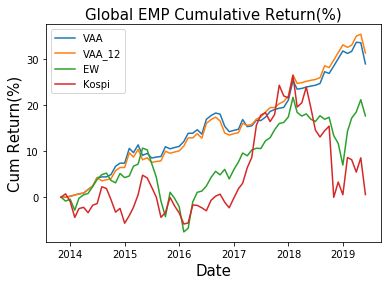

In [66]:
plt.gcf().clear()
# style.use('seaborn')
# plt.figure(figsize=(15, 6))

plt.title('Global EMP Cumulative Return(%)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Cum Return(%)', fontsize=15)


# VAA_누적
tmp_dict = pd.Series(0, index=[Cum_B_T_port_return_2.index[0] + relativedelta(days=1) - relativedelta(months=1) - relativedelta(days=1)])
Cum_B_T_port_return_2_ = pd.concat([tmp_dict, Cum_B_T_port_return_2['return']])

plt.plot(((Cum_B_T_port_return_2_ + 1).cumprod() -1) * 100, linewidth=1.5, label="VAA")


# VAA_12M
tmp_dict = pd.Series(0, index=[Window_12_B_T_port_return.index[0] + relativedelta(days=1) - relativedelta(months=1) - relativedelta(days=1)])
Window_12_B_T_port_return_ = pd.concat([tmp_dict, Window_12_B_T_port_return['return']])

plt.plot(((Window_12_B_T_port_return_ + 1).cumprod() -1) * 100, linewidth=1.5, label="VAA_12")


# Equal Weight
tmp_dict = pd.Series(0, index=[EW_port_monthly_return['2013-11':].index[0] + relativedelta(days=1) - relativedelta(months=1) - relativedelta(days=1)])
EW_port_monthly_return_ = pd.concat([tmp_dict, EW_port_monthly_return['2013-11':]])

plt.plot(((EW_port_monthly_return_ + 1).cumprod() -1) * 100, linewidth=1.5, label="EW")


# KOSPI
tmp_dict = pd.Series(0, index=[kospi_monthly_return['2013-11':]['value'].index[0] + relativedelta(days=1) - relativedelta(months=1) - relativedelta(days=1)])
kospi_monthly_return_ = pd.concat([tmp_dict, kospi_monthly_return['2013-11':]['value']])

plt.plot(((kospi_monthly_return_ + 1).cumprod() -1) * 100, linewidth=1.5, label="Kospi")

plt.legend()

plt.savefig("Global EMP Return_비교.png", format='png')